   # Estimating Carbon Emissions for Vehicles

### Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

C:\Users\shrad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shrad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\shrad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
columns = df.columns
print(columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df = df.rename({
    'Vehicle Class' : 'Vehicle_Class' , 
    'Engine Size(L)': 'Engine_Size' ,
    'Fuel Type' : 'Fuel_Type',
    'Fuel Consumption City (L/100 km)' : 'Fuel_Consumption_City' , 
    'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Consumption_Hwy' ,
    'Fuel Consumption Comb (L/100 km)' : 'Fuel_Consumption_Comb' ,
    'Fuel Consumption Comb (mpg)' : 'Fuel_Consumption_Comb' , 
    'CO2 Emissions(g/km)' : 'CO2_Emissions'
} , axis = 1)
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb', 'CO2_Emissions'],
      dtype='object')

In [8]:
# summarize the data
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb,CO2_Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


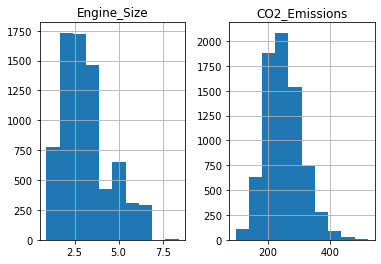

In [9]:
viz = df[['Engine_Size','CO2_Emissions']]
viz.hist()
plt.show()

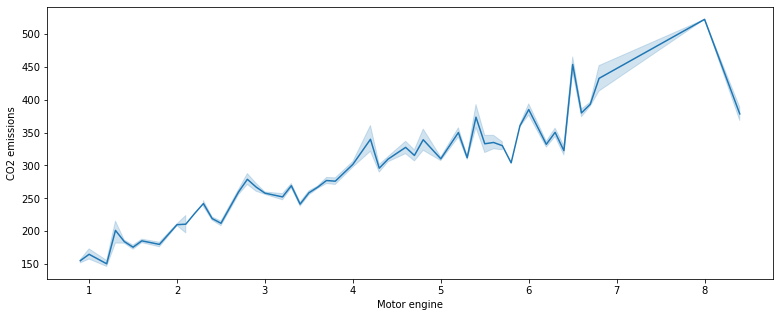

In [10]:
import seaborn as sns
plt.figure(figsize=(13,5)) 
sns.lineplot(x=df['Engine_Size'], y=df['CO2_Emissions']) 
plt.xlabel('Motor engine') 
plt.ylabel('CO2 emissions') 
plt.show()

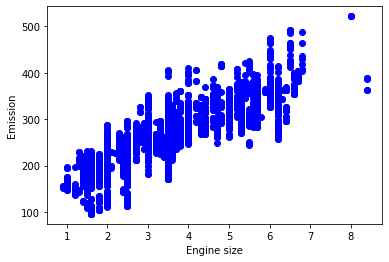

In [11]:
plt.scatter(df.Engine_Size, df.CO2_Emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Simple Linear Regression Model

In [12]:
#Importing LinearRegression and neccesities
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
#Splitting data and training model
x=df[['Engine_Size']]
y=df['CO2_Emissions']

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.85089474]]
Intercept:  [134.01931147]


Text(0, 0.5, 'Emission')

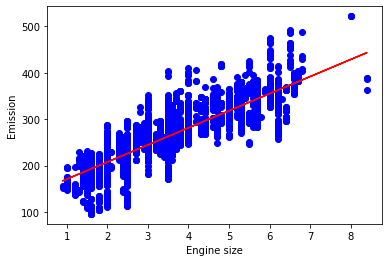

In [17]:
plt.scatter(train.Engine_Size, train.CO2_Emissions,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
#Predicting using model and calculating the error
y_pred = model.predict(x_test)
print("Error between predicted and actual: ",mean_squared_error(y_pred, y_test))

Error between predicted and actual:  888.281389249969


### Evaluating the metrics

In [19]:
from sklearn import metrics

#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test, y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 


R2: 0.73
Adj_R2: 0.73
Mean Absolute Error: 23.00
Mean Squared Error: 888.28
Root Mean Squared Error: 29.80


### Multivariate Linear Regression Model

In [20]:
mdf = df[['Engine_Size', 'Cylinders', 'Fuel_Consumption_City','Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb','CO2_Emissions']]
mdf.head(9)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb,CO2_Emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
6,3.5,6,11.8,8.1,10.1,28,232
7,3.7,6,12.8,9.0,11.1,25,255
8,3.7,6,13.4,9.5,11.6,24,267


In [21]:
#Only selecting columns with numerical values (skipping 'Transmission' and 'Fuel Type'Fuel Type)
x1 = mdf[['Engine_Size', 'Cylinders', 'Fuel_Consumption_City','Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb']]
y1 = mdf['CO2_Emissions']


In [22]:
#Importing LinearRegression and neccesities
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
#Splitting data and training model
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1)
modal = LinearRegression()
modal.fit(x1_train,y1_train)

LinearRegression()

In [24]:
y1_pred = modal.predict(x1_test)

### Evaluating the metrics

In [25]:
print('\nR2: {:.2f}'.format(metrics.r2_score(y1_test, y1_pred)))
adjusted_r_squared = 1-(1-metrics.r2_score(y1_test, y1_pred))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))) 


R2: 0.91
Adj_R2: 0.91
Mean Absolute Error: 11.39
Mean Squared Error: 328.97
Root Mean Squared Error: 18.14
